This notebook should be revised to get statistics from measurements data instead of operation data

## Seine Project
Get the frequency of measurements for the different stations.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# importing necessary functions from other files

import os
import sys

# to facilitate the use of notebooks
%load_ext autoreload
%autoreload 2

# Get the current directory of the notebook
current_dir = os.getcwd()
print(current_dir)

# importing necessary functions
from statistics_functions import station_hist, process_df, plot_distrib, stats_per_year, stations_per_decade

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/mahlia/Desktop/SeineProject/python_codes/common


# Import operation file

In [ ]:
# Get the current directory of the notebook
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir, os.pardir))
# Import phychem data
param_file = os.path.join(parent_dir, "phychem_data", "phychem_param_80_19", "all_concatenated1980_2019.csv")
df = pd.read_csv(param_file, delimiter=";")

# Process df

For biol:
grouped_df = process_df(df,field_id_station="CdStationMesureEauxSurface",field_date="DateDebutOperationPrelBio", coord_x="coordonnee_x", coord_y="coordonnee_x")

For phychem:
grouped_df = process_df(df,field_id_station="code_station",field_date="date_prelevement", coord_x="x_prelevement", coord_y="y_prelevement")


We consider two different types of df: basic and grouped

In [44]:
grouped_df = process_df(df,field_id_station="CdStationMesureEauxSurface",field_date="DateDebutOperationPrelBio", coord_x="coordonnee_x", coord_y="coordonnee_x")
grouped_df.shape

/Users/mahlia/Desktop/SeineProject/python_functions/stats_functions.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[field_date] = pd.to_datetime(df[field_date]).dt.date


(1877, 8)

## Most frequent

In [46]:
# Two conditions for most frequent stations
grouped_freq_df = grouped_df.loc[(grouped_df['MonthIntMean'] <= 24) & grouped_df['MonthIntStd'].notna()]
grouped_freq_df.shape[0]

448

# Stations distributions (number of measurements and months interval)

For biol:
Number of biol stations: 1877 (all) --> 731 (at least 3 meas.) --> 448 (at least 3 and < 24)
station_hist([grouped_df, grouped_freq_df], type_data="biological")

for phychem:
station_hist([grouped_df, grouped_freq_df], type_data="physico-chemical")

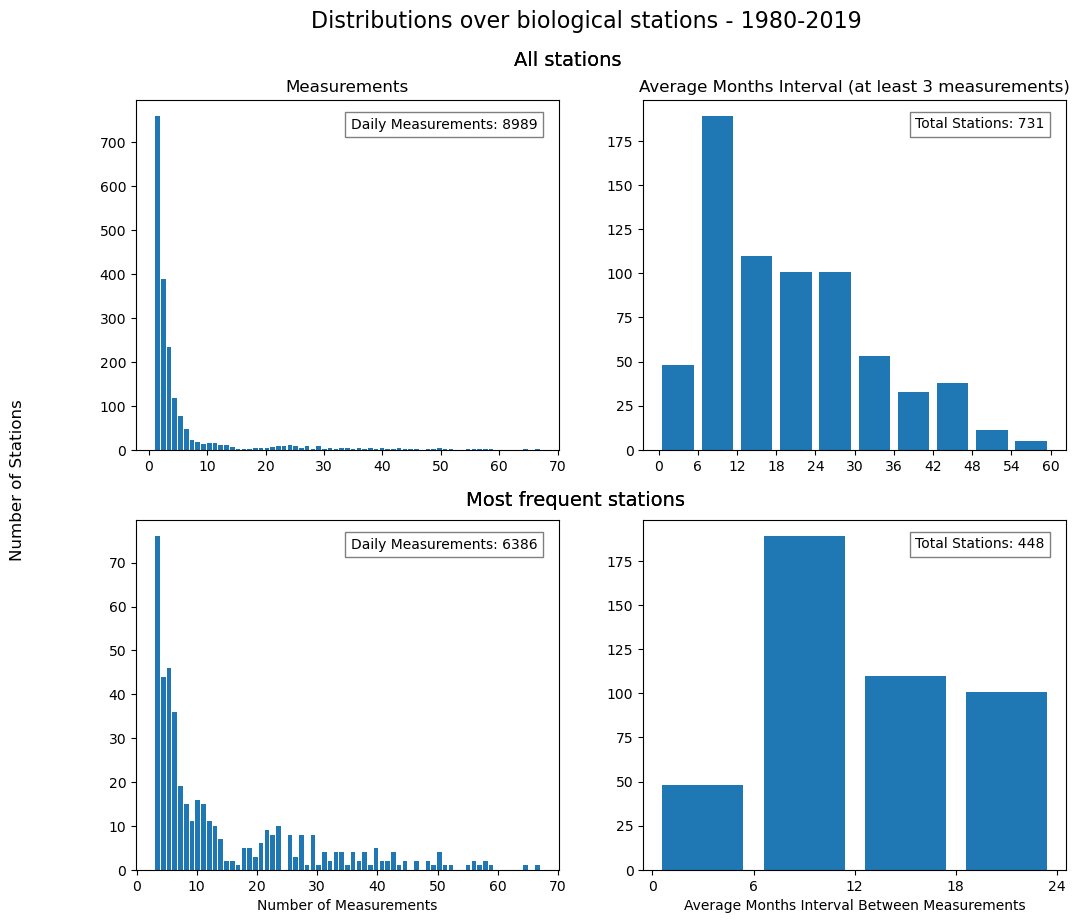

In [47]:
# Display graphs
# total count is the number of lines in initial df without duplicates
station_hist([grouped_df, grouped_freq_df], type_data="biological")

# Correlation Month Interval - Number of measurements

For biol:
plot_distrib(df_list, type_data="biological")

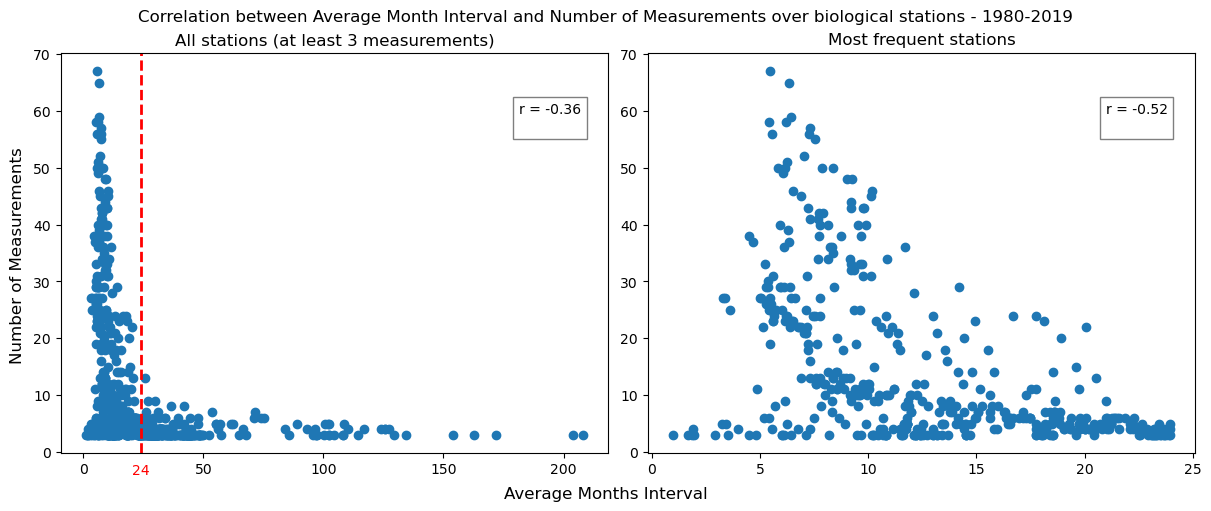

In [48]:
# take data from 0 to +24 months interval, at least 3 measurements
grouped_std_df = grouped_df.loc[grouped_df['MonthIntStd'].notna()]

df_list = [grouped_std_df, grouped_freq_df]
plot_distrib(df_list, type_data="biological")

# Number of measurements per year

For biol: 
df_std = df[df['CdStationMesureEauxSurface'].isin(grouped_std_df['CdStationMesureEauxSurface'])]
freq_df = df[df['CdStationMesureEauxSurface'].isin(grouped_freq_df['CdStationMesureEauxSurface'])]
stats_per_year([df_std, freq_df], type_data = "biological", field_date="DateDebutOperationPrelBio")

for pychem:
filtered_df = df[df['code_station'].isin(grouped_freq_df['code_station'])]
stats_per_year(df_list, type_data = "physico-chemical", field_date="date_prelevement")

/Users/mahlia/Desktop/SeineProject/python_functions/stats_functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[field_date] = pd.to_datetime(df[field_date])
/Users/mahlia/Desktop/SeineProject/python_functions/stats_functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[field_date] = pd.to_datetime(df[field_date])


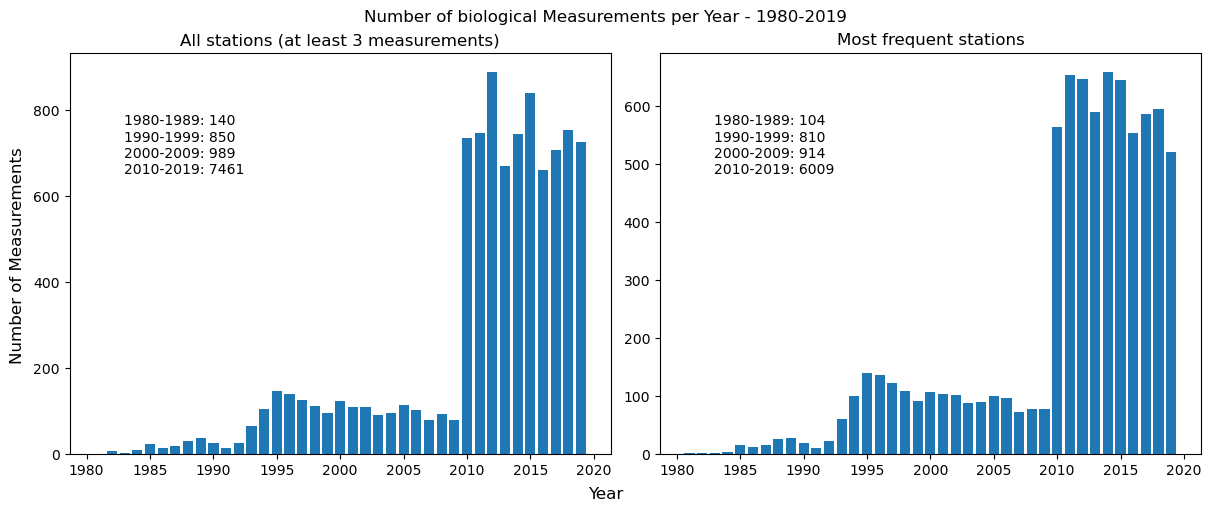

In [49]:
# df is not grouped but grouped_freq_df is grouped so only get the corresponding station id
# freq_df is the not grouped most frequent stations

df_std = df[df['CdStationMesureEauxSurface'].isin(grouped_std_df['CdStationMesureEauxSurface'])]
freq_df = df[df['CdStationMesureEauxSurface'].isin(grouped_freq_df['CdStationMesureEauxSurface'])]
stats_per_year([df_std, freq_df], type_data = "biological", field_date="DateDebutOperationPrelBio")

# Number of stations per decade
Need to consider basic df

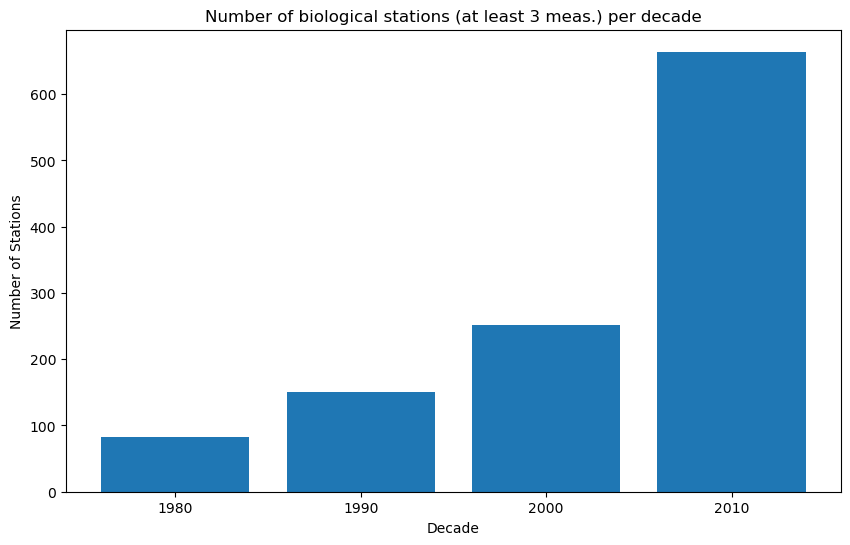

In [76]:
# first remove duplicate to only get stations and not operations
df_station = df_std.drop_duplicates(subset='CdStationMesureEauxSurface')
stations_per_decade(df_station, "biological", "date_premier_prelevement", "date_dernier_prelevement")

## Stats about stations on river network

In [ ]:
def sta_in_perimeter(null_values, total, type_data):

    y = np.array([total-i for i in null_values])
    x = np.array([1,2,3,4,5])
    x_labels = [100,250,500,750,1000]

    plt.bar(x, y)
    plt.xlabel('Perimeter (m)')
    plt.ylabel('Number of stations')

    # Adding a text box
    plt.axhline(y=total, color='red', linestyle='--')
    plt.text(0.2, total, f'Total: {total}', color='red', ha='right', va='center')

    plt.xticks(x, x_labels)

    plt.title(f'Number of Station {type_data} for joining perimeter - 1980-2019\n')
    plt.show()
    

In [ ]:
# modify this from Qgis
null_values = [253, 89, 36, 17, 7]
total = 448

sta_in_perimeter(null_values=null_values, total=total, type_data="BMF")

In [ ]:
# define df correctly (most frequent or all)

def count_HS(df):

    df['ORD_STRA'].fillna(0, inplace=True) # set too far away to 0 instead of NaN
    df['ORD_STRA'] = df['ORD_STRA'].astype(int)

    # each HS number count occurences
    counts = df['ORD_STRA'].value_counts().sort_index()

    plt.bar(counts.index[1::], counts.values[1::]) # not considering the ones too far away
    plt.xlabel('Horton Strahler number')
    plt.ylabel('Number of stations')
    plt.title('Number of Station BMF for HS number, p=500m')
    plt.text(0.95, 0.95, f'Total Stations: {len(df)}\nStations outside perimeter: {counts.values[0]}', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()